# Exercise 3-1: Create some plots

In [2]:
import pandas as pd

## Get the data

In [4]:
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [5]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,1983.8,466.1,298.3,484.8
1901,1695.0,427.6,273.6,454.4
1902,1655.7,403.3,252.5,421.5
1903,1542.1,414.7,268.2,434.1
1904,1591.5,425.0,305.2,471.4


## Visualize the data

<Axes: xlabel='Year', ylabel='DeathRate'>

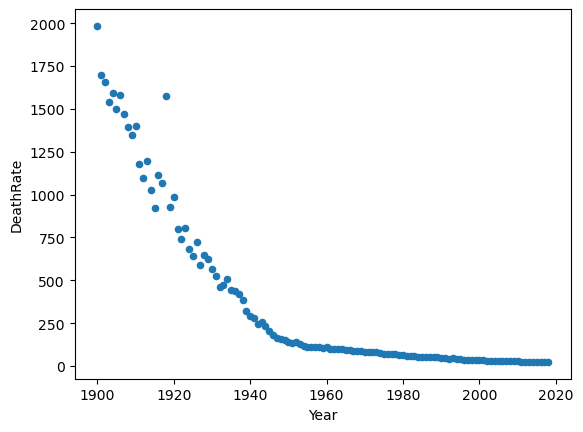

In [10]:
mortality_data.query('AgeGroup == "01-04 Years"').plot.scatter(x='Year', y='DeathRate')

<Axes: xlabel='Year'>

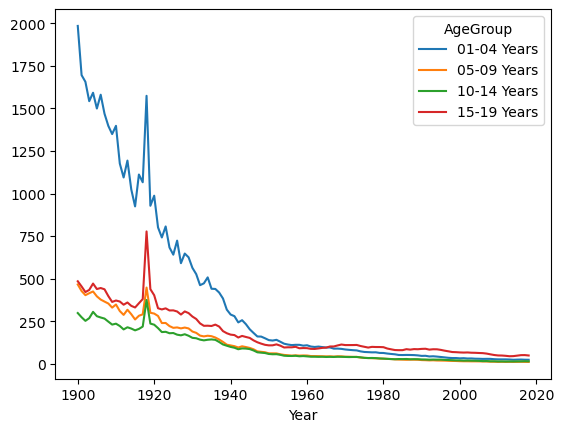

In [11]:
mortality_wide.plot()

<Axes: title={'center': 'Mortality: 15-19 Years'}, xlabel='Year'>

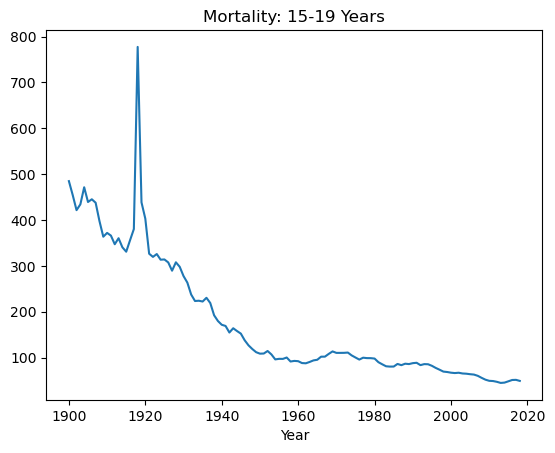

In [38]:
mortality_wide.plot.line(y='15-19 Years', title='Mortality: 15-19 Years', legend=False)

<Axes: xlabel='Year'>

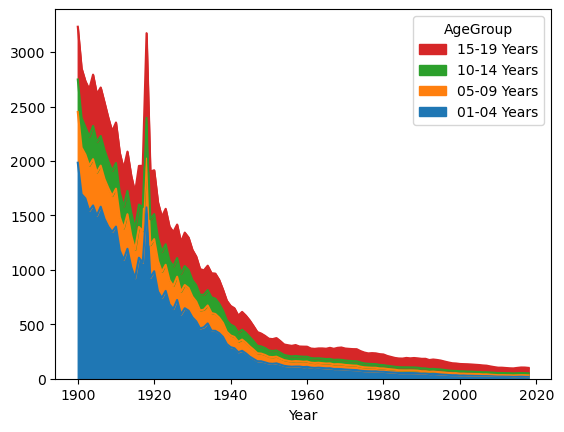

In [40]:
mortality_wide.plot.area(legend='reverse')

<Axes: title={'center': 'Child Mortality in 2000'}>

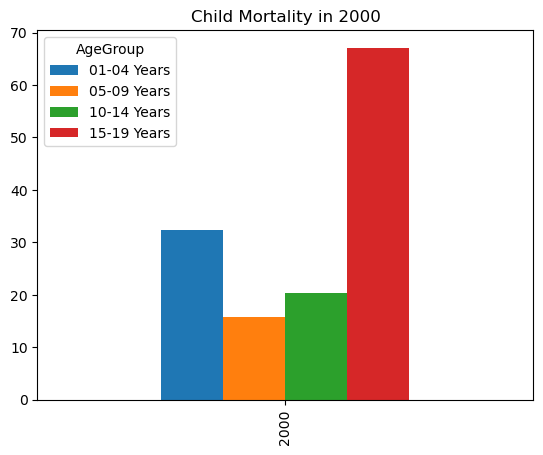

In [50]:
mortality_wide.query('Year == 2000') \
    .plot.bar(title='Child Mortality in 2000', xlabel='')

<Axes: title={'center': 'Child Mortality in 2000'}, xlabel='AgeGroup'>

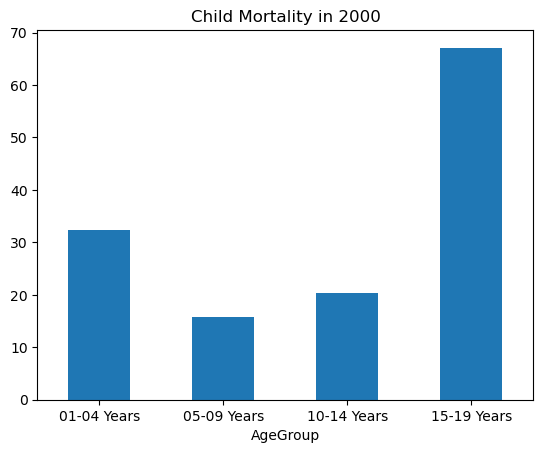

In [70]:
mortality_data.query('Year == 2000') \
    .pivot(index='AgeGroup', columns='Year', values='DeathRate') \
    .plot.bar(title='Child Mortality in 2000', legend=False, rot=360)

<Axes: ylabel='Frequency'>

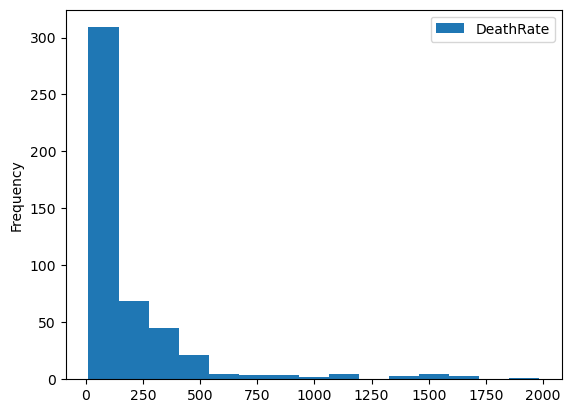

In [72]:
mortality_data.plot.hist(y='DeathRate', bins=15)

<Axes: title={'center': 'Child Mortality Rates in 1990'}, ylabel='Density'>

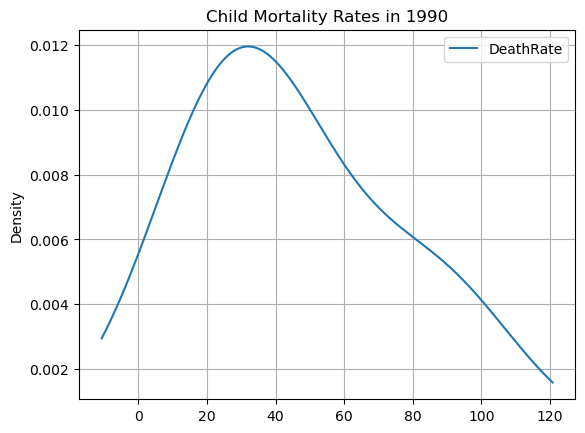

In [78]:
mortality_data.query('Year==1990') \
    .plot.density(y='DeathRate', grid=True, title='Child Mortality Rates in 1990')

<Axes: ylabel='DeathRate'>

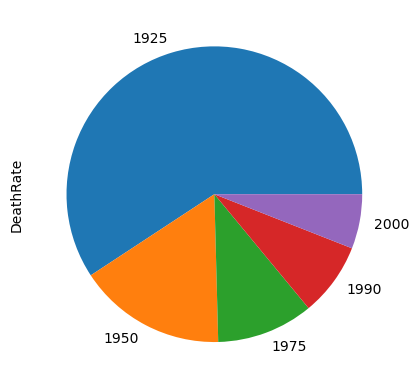

In [80]:
mortality_data.query('Year in (1990, 1925, 1950, 1975, 2000)') \
    .groupby('Year').DeathRate.sum().plot.pie()

array([[<Axes: title={'center': 'Mortality: 1-4'}, ylabel='Year'>,
        <Axes: title={'center': 'Mortality: 5-9'}, ylabel='Year'>],
       [<Axes: title={'center': 'Mortality: 10-14'}, ylabel='Year'>,
        <Axes: title={'center': 'Mortality: 15-19'}, ylabel='Year'>]],
      dtype=object)

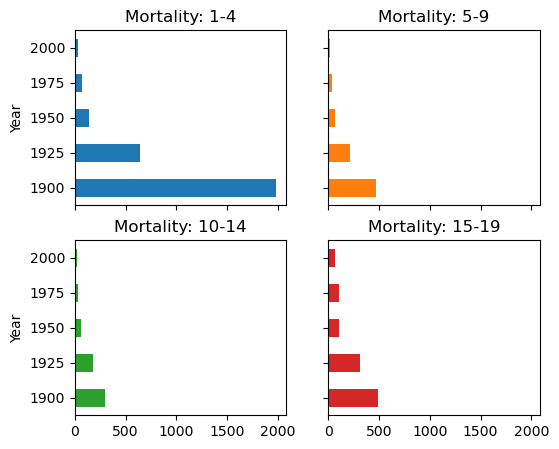

In [129]:
mortality_wide.query('Year in (1900, 1925, 1950, 1975, 2000)').plot.barh(
    title=['Mortality: 1-4', 'Mortality: 5-9',
           'Mortality: 10-14', 'Mortality: 15-19'],
    sharey=True, subplots=True, legend=False, layout=(2, 2), figsize=(6,5))